In [1]:
%load_ext autoreload
%autoreload 2
exec(open('init_notebook.py').read())
import os
from matplotlib import pyplot as plt
from HighD import HighD
from Filter import Filter
from FollowFilter import FollowFilter
from Plot import Plot
from Visualizer import GIF
from helper import *

current working dirC:\Users\abjawad\Documents\GitHub\cogmod-driver-behavior-model\lib\highD


In [2]:
data_file = r"C:/Users/abjawad/Documents/GitHub/cogmod-driver-behavior-model/logs/follow_scenario_0.csv"
dataset_path = r"C:/Users/abjawad/Documents/GitHub/cogmod-driver-behavior-model/lib/highD/follow_meta.csv"


In [3]:
actual_df = pd.read_csv(dataset_path)
actual_df.head()

,dataset_id,scenario_id,ego_id,preceding_id,frame,ego_x,ego_y,ego_vx,ego_vy,ego_ax,ego_ay,preceding_x,preceding_y,preceding_vx,preceding_vy,preceding_ax,preceding_ay
0,1,2,50,47,0,0.00,0.00,40.28,-0.18,0.35,0.00,61.68,0.09,39.55,0.07,0.17,0.09
1,1,2,50,47,1,1.48,0.00,40.30,-0.18,0.35,0.01,63.26,0.09,39.55,0.07,0.17,0.09
2,1,2,50,47,2,3.01,-0.01,40.31,-0.18,0.36,0.01,64.84,0.10,39.56,0.08,0.17,0.08
3,1,2,50,47,3,4.57,-0.02,40.32,-0.18,0.36,0.01,66.42,0.10,39.57,0.08,0.17,0.08
4,1,2,50,47,4,6.15,-0.03,40.34,-0.18,0.36,0.02,68.00,0.10,39.57,0.08,0.16,0.08


In [4]:
# read csv
simulated_df = pd.read_csv(data_file)
# drop first row 
simulated_df = simulated_df.drop(simulated_df.index[0])
simulated_df = simulated_df[simulated_df['scenario_status'] == 'ScenarioState.RUNNING']
# make frame start from zero
simulated_df['frame'] = simulated_df['frame'] - simulated_df['frame'].min()
simulated_df.head()

,scenario_id,exec_num,frame,scenario_status,ego_id,c_x,c_y,c_speed,c_acceleration,c_steer,c_throttle,c_brake,preceding_id,a_x,a_y,a_speed,a_acceleration,a_steer,a_throttle,a_brake
85,2.0,0.0,0.0,ScenarioState.RUNNING,681.0,-73.074738,5.720869,40.029266,9.270471,-1.755985e-06,0.00,0.5,682.0,-11.884253,5.356729,39.390461,7.484446,3.811912e-05,0.00,0.5
86,2.0,0.0,1.0,ScenarioState.RUNNING,681.0,-71.476448,5.710014,39.955471,1.886613,3.671705e-07,0.95,0.0,682.0,-10.311092,5.348117,39.326878,1.903767,-8.160619e-06,0.95,0.0
87,2.0,0.0,2.0,ScenarioState.RUNNING,681.0,-69.893974,5.699267,39.565220,9.759416,4.990954e-07,0.95,0.0,682.0,-8.753455,5.339592,38.944023,9.571730,1.502008e-05,0.95,0.0
88,2.0,0.0,3.0,ScenarioState.RUNNING,681.0,-68.312187,5.688525,39.542465,0.689585,-3.416843e-06,0.95,0.0,682.0,-7.196004,5.331070,38.933533,0.458665,-9.761742e-07,0.95,0.0
89,2.0,0.0,4.0,ScenarioState.RUNNING,681.0,-66.742523,5.677864,39.243877,7.472831,2.855051e-06,0.95,0.0,682.0,-5.650807,5.322616,38.632080,7.545414,1.670217e-06,0.95,0.0


In [5]:
scenario_id = simulated_df['scenario_id'].unique()[0]
actual_df = actual_df[actual_df['scenario_id'] == scenario_id]

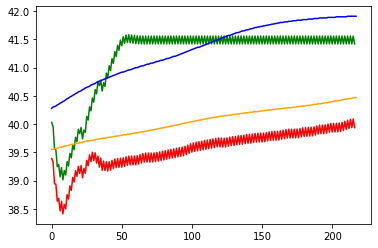

In [6]:
# plot frame in x and speed in y
plt.plot(simulated_df["frame"], simulated_df["c_speed"], color='green')
plt.plot(simulated_df["frame"], simulated_df["a_speed"], color='red')
plt.plot(actual_df["frame"], actual_df["ego_vx"], color='blue')
plt.plot(actual_df["frame"], actual_df["preceding_vx"], color='orange')
plt.show()